In [6]:
import pandas as pd
import yaml
from PIL import Image
import numpy
from torchvision import transforms
import sys
sys.path.append('../')

# instnace of data loader and inspect single element of data loader by next iter 

dat_train = pd.read_csv("~/Documents/cv4e/CV4E-2025/data/tabular/splits/frac1.0_split0.25/dat_train.csv")
dat_val = pd.read_csv("~/Documents/cv4e/CV4E-2025/data/tabular/splits/frac1.0_split0.25/dat_val.csv")
dat_test = pd.read_csv("~/Documents/cv4e/CV4E-2025/data/tabular/splits/frac1.0_split0.25/dat_test.csv")

cfg = yaml.safe_load(open("../configs/resnet101.yaml", "r"))

In [7]:
dat_train.label_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       16, 18, 19])

In [8]:
cfg

{'model_name': 'resnet101',
 'seed': 32678456782,
 'device': 'cuda',
 'num_workers': 16,
 'basepath': '/mnt/class_data/group4/val/trailcam/',
 'train_val_split': 0.4,
 'data_frac': 0.01,
 'image_size': [256, 256],
 'num_epochs': 100,
 'batch_size': 64,
 'learning_rate': 0.01,
 'weight_decay': 0}

In [9]:
!pwd

/home/Vale/Documents/cv4e/CV4E-2025/mdclassifier


In [10]:
from train import create_dataloader
# from model import *
# from dataset import *

dl_train = create_dataloader(cfg, dat_train.crop_path, dat_train.label_id, split="train", model="resnet101")

In [11]:
instance=next(iter(dl_train))

In [12]:
instance.keys()

dict_keys(['image_id', 'image', 'label'])

In [13]:
x = 23
im=instance["image"][x]
instance["label"][x]

tensor(2)

In [17]:
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

im = invTrans(im)

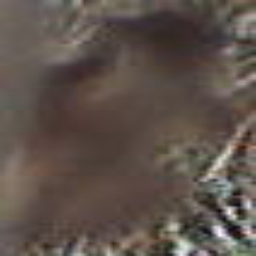

In [18]:
Image.fromarray((255*numpy.transpose(im.numpy(), (1,2,0))).astype(numpy.uint8))